Do your work for these exercises in a jupyter notebook named `scaling`. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [2]:
# import personal libraries
import wrangle as w
import explore as e

In [3]:
# select libraries to pull
w.print_libs()

import itertools -> iterations
import time -> time and date work
from tqdm import tqdm -> progress bars on for loopsimport pandas as pd -> large scale database work
import numpy as np -> advanced numerical work
import matplotlib.pyplot as plt -> plotting work
import seaborn as sns -> advanced and intuitive plotting
from scipy import stats -> statistical work
from pydataset import data -> list of datasets
import os -> operating system work
import warnings -> getting rid of pesky warnings
from sklearn import metrics -> model metrics
from sklearn.impute import SimpleImputer -> dynamic value filling
from sklearn.model_selection import train_test_split -> splitting datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree -> DT modeling
from sklearn.neighbors import KNeighborsClassifier -> KNN modeling
from sklearn.ensemble import RandomForestClassifier -> RF modeling
from sklearn.linear_model import LogisticRegression -> LR modeling
from sklearn.preprocessing import MinMaxScaler,

In [4]:
# import additional libraries
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [5]:
# import data
train,validate,test = w.wrangle_zillow()

Reading from file...


In [358]:
# check the data
w.df_info(train)

,nunique,dtypes,isnull,165960
bedrooms,17,int64,0,3
bathrooms,37,float64,0,2.0
property_area,9540,int64,0,2132
property_value,446402,int64,0,141962
yearbuilt,149,int64,0,1948
taxamount,707961,float64,0,1606.78
fips,3,int64,0,6037
county,3,object,0,Los Angeles


In [366]:
train.index.nunique()

1284141

1. [x] Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [99]:
# create dataset without fips/county
df = train.drop(columns=['fips','county'])

In [215]:
# apply the MinMaxScaler
minmax_scaler = MinMaxScaler()

train_minmax = pd.DataFrame(minmax_scaler.fit_transform(df),columns=df.columns)

In [217]:
train_scaled

,bedrooms,bathrooms,property_area,property_value,yearbuilt,taxamount
0,0.277778,0.125000,0.005667,0.007880,0.948837,0.007001
1,0.166667,0.062500,0.003165,0.006689,0.744186,0.006561
2,0.222222,0.062500,0.002696,0.000918,0.711628,0.001040
3,0.166667,0.078125,0.003766,0.003941,0.920930,0.003860
4,0.222222,0.062500,0.004285,0.006331,0.748837,0.006585
...,...,...,...,...,...,...
1284136,0.166667,0.062500,0.002732,0.003470,0.753488,0.003706
1284137,0.222222,0.093750,0.005033,0.004629,0.827907,0.003929
1284138,0.277778,0.093750,0.003581,0.003333,0.762791,0.003628
1284139,0.222222,0.140625,0.006912,0.012363,0.930233,0.012074


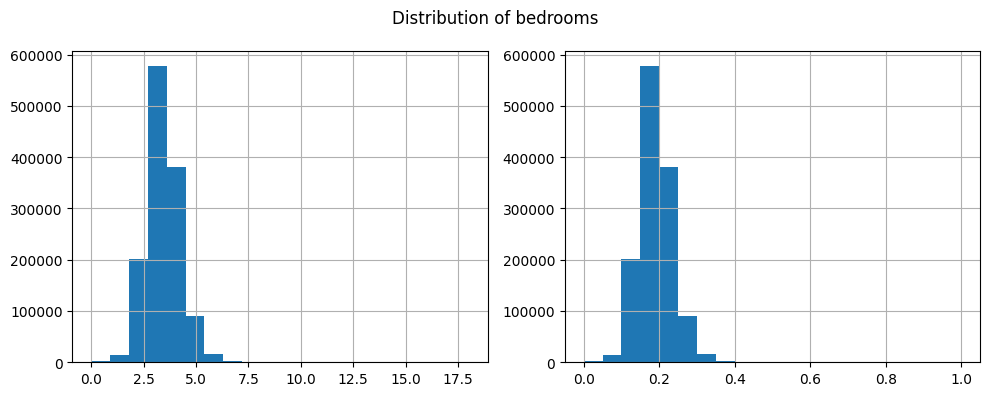

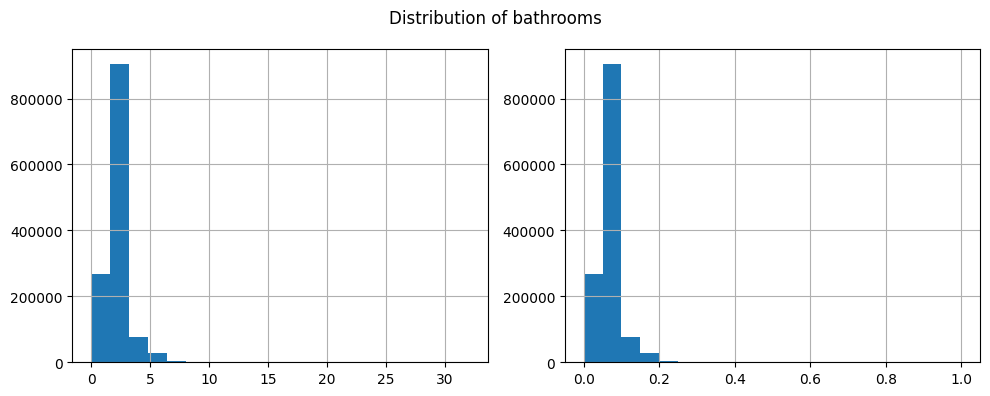

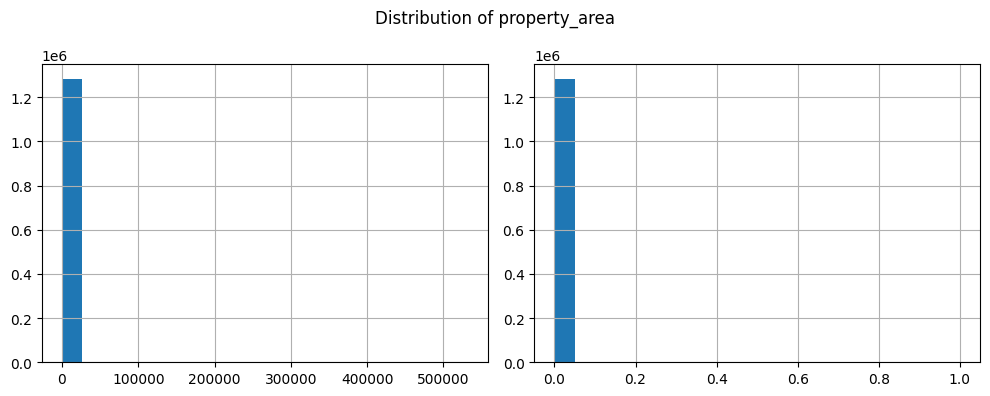

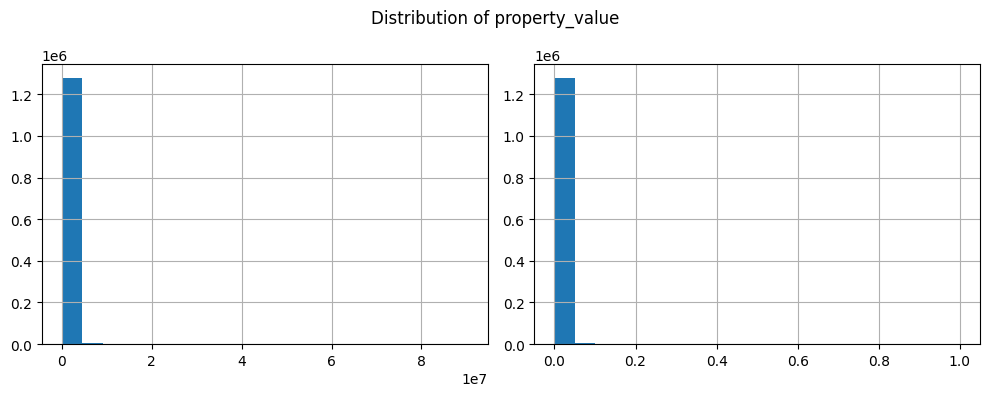

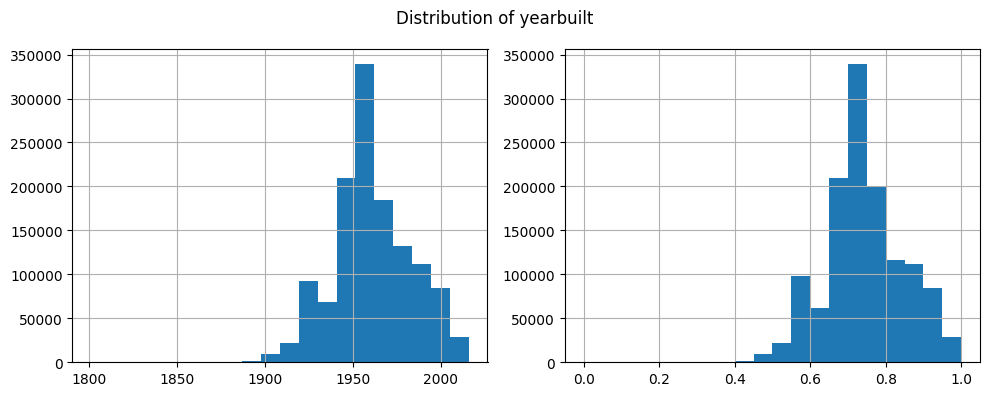

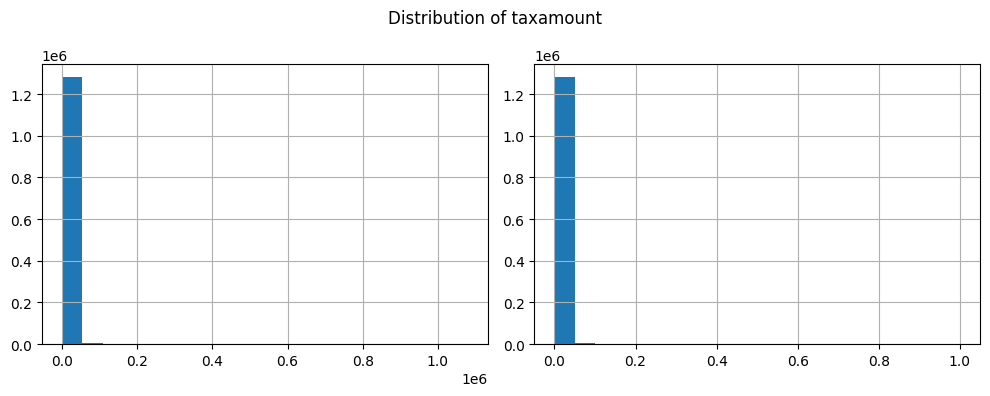

In [308]:
# visualize the distributions
for col in df.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=20)
    
    plt.subplot(1,2,2)
    train_minmax[col].hist(bins=20)
    
    plt.suptitle(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

In [274]:
# apply the StandardScaler
standard_scaler = StandardScaler()

train_standard = pd.DataFrame(standard_scaler.fit_transform(df),columns=df.columns)
train_standard

,bedrooms,bathrooms,property_area,property_value,yearbuilt,taxamount
0,1.821396,1.773697,1.065210,0.363093,1.989173,0.244396
1,-0.322924,-0.242880,-0.168200,0.207086,0.001396,0.184603
2,0.749236,-0.242880,-0.399290,-0.549436,-0.314842,-0.564629
3,-0.322924,0.261264,0.127856,-0.153189,1.718113,-0.181904
4,0.749236,-0.242880,0.384004,0.160094,0.046572,0.187981
...,...,...,...,...,...,...
1284136,-0.322924,-0.242880,-0.381657,-0.214908,0.091749,-0.202791
1284137,0.749236,0.765408,0.752449,-0.062933,0.814577,-0.172593
1284138,1.821396,0.765408,0.036904,-0.232921,0.182103,-0.213452
1284139,0.749236,2.277841,1.678667,0.950729,1.808466,0.932867


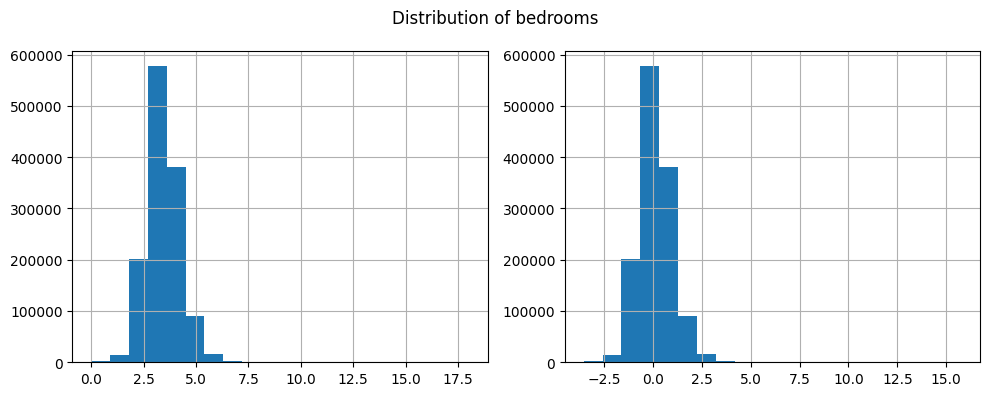

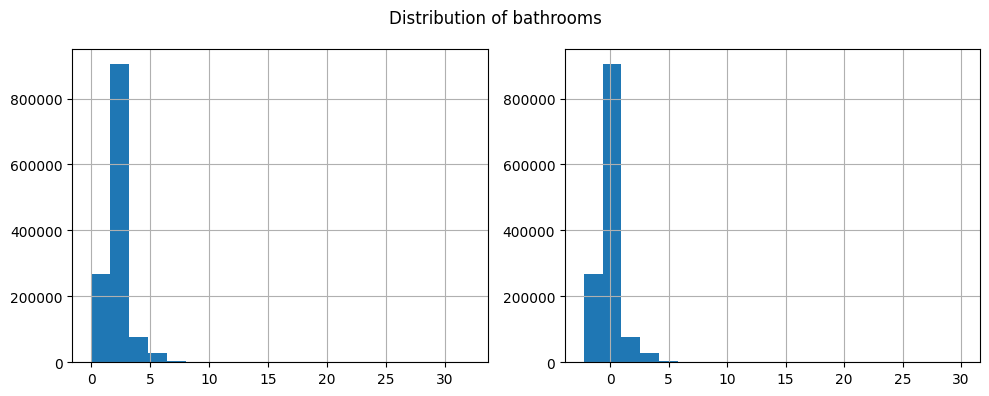

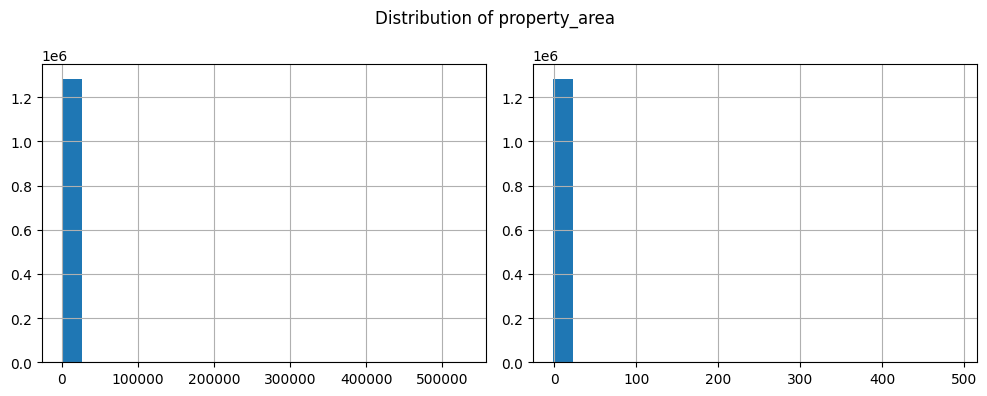

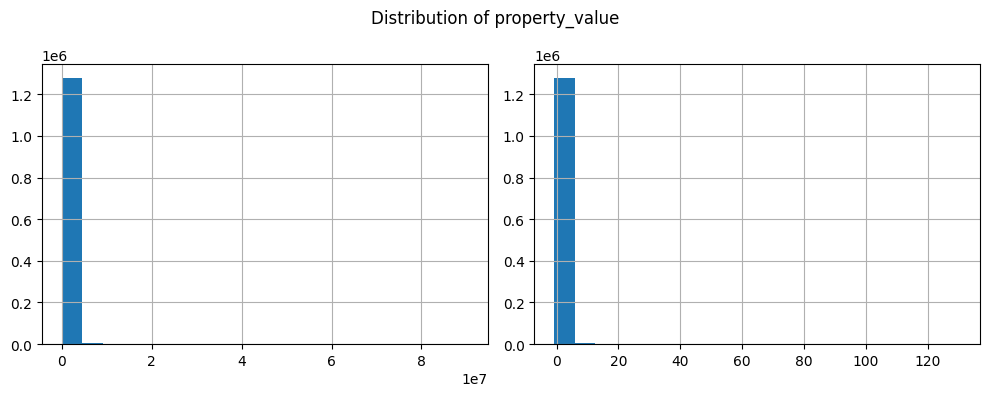

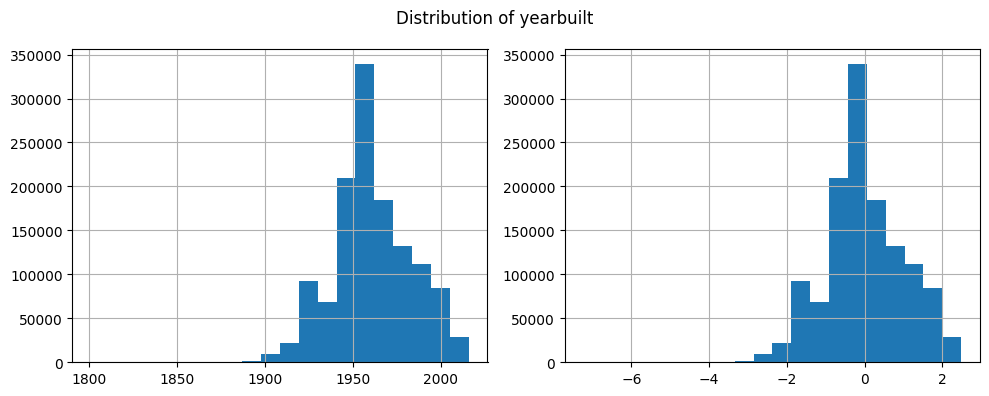

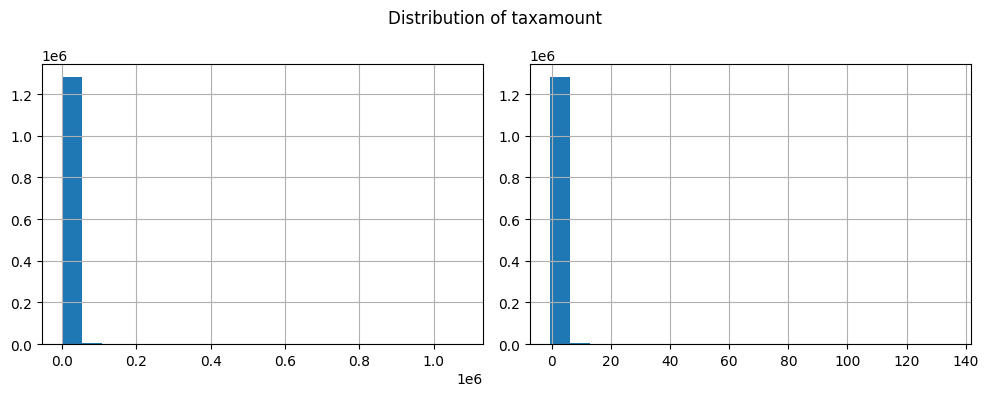

In [306]:
# visualize the distributions
for col in df.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=20)
    
    plt.subplot(1,2,2)
    train_standard[col].hist(bins=20)
    
    plt.suptitle(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

In [278]:
# apply the RobustScaler
robust_scaler = RobustScaler()

train_robust = pd.DataFrame(robust_scaler.fit_transform(df),columns=df.columns)
train_robust

,bedrooms,bathrooms,property_area,property_value,yearbuilt,taxamount
0,2.0,2.0,1.461053,1.106331,1.740741,0.890971
1,0.0,0.0,0.062105,0.795678,0.111111,0.768237
2,1.0,0.0,-0.200000,-0.710774,-0.148148,-0.769669
3,0.0,0.5,0.397895,0.078267,1.518519,0.015929
4,1.0,0.0,0.688421,0.702104,0.148148,0.775171
...,...,...,...,...,...,...
1284136,0.0,0.0,-0.180000,-0.044632,0.185185,-0.026945
1284137,1.0,1.0,1.106316,0.257993,0.777778,0.035041
1284138,2.0,1.0,0.294737,-0.080502,0.259259,-0.048827
1284139,1.0,2.5,2.156842,2.276483,1.592593,2.304157


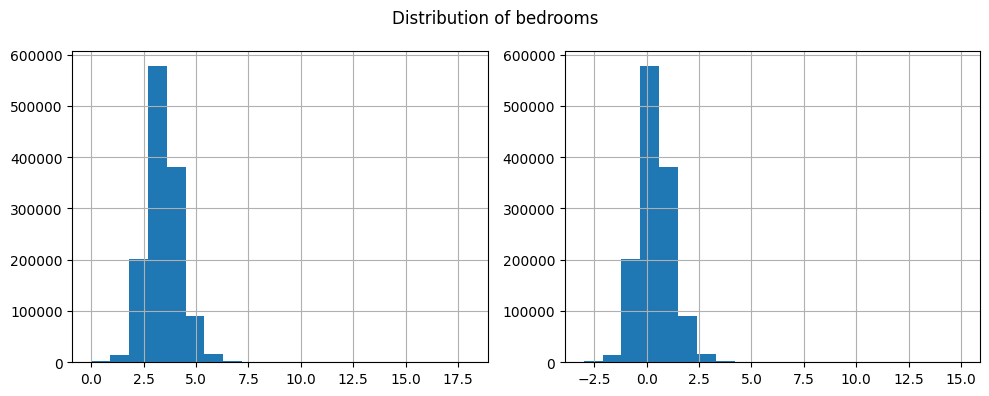

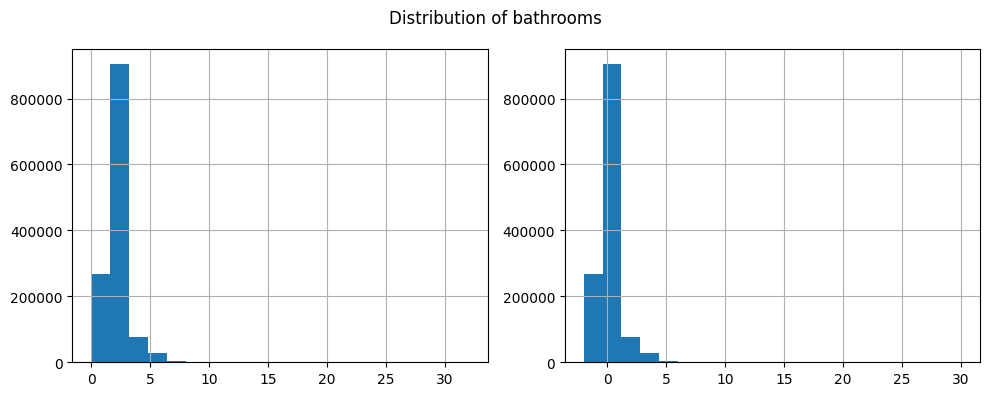

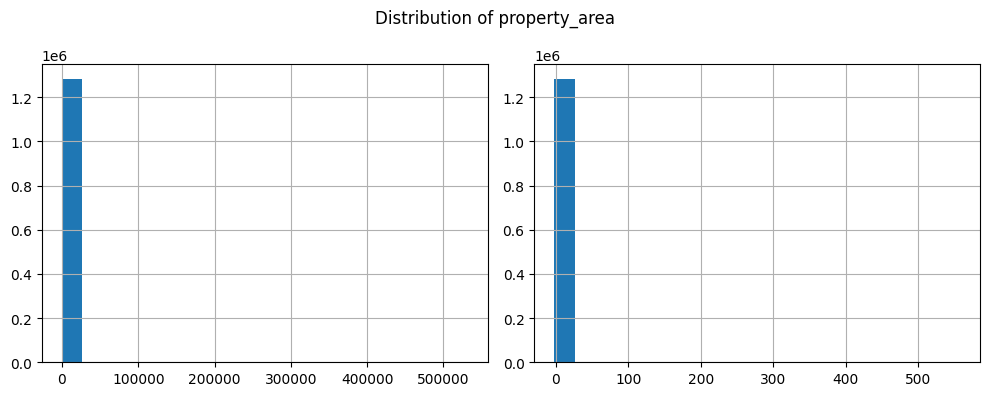

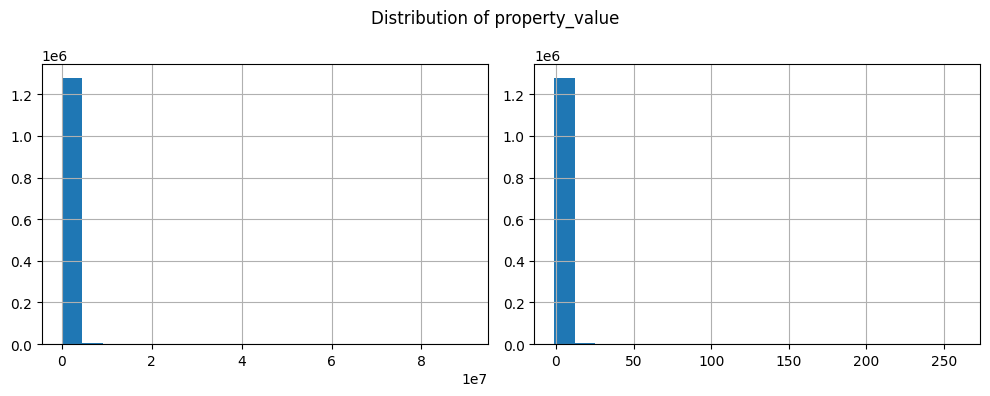

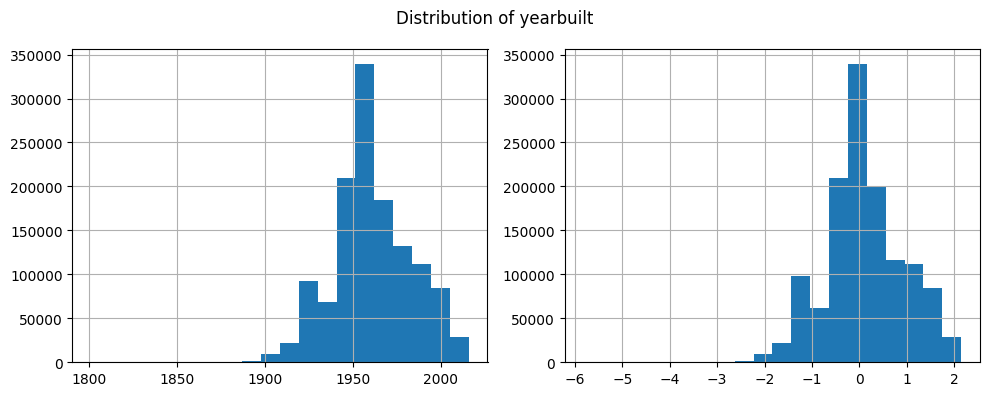

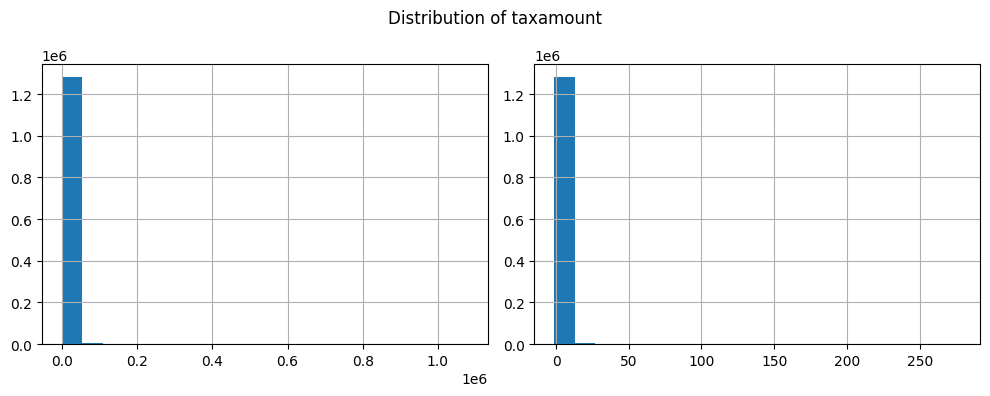

In [310]:
# visualize the distributions
for col in df.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=20)
    
    plt.subplot(1,2,2)
    train_robust[col].hist(bins=20)
    
    plt.suptitle(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

2. [x] Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?

In [223]:
# revert the DataFrames
reverted_minmax = pd.DataFrame(minmax_scaler.inverse_transform(train_minmax),columns=df.columns)
reverted_standard = pd.DataFrame(standard_scaler.inverse_transform(train_standard),columns=df.columns)
reverted_robust = pd.DataFrame(robust_scaler.inverse_transform(train_robust),columns=df.columns)

In [324]:
# compare the DataFrames?
(df.reset_index(drop=True) == reverted_minmax).mean()

bedrooms          0.927599
bathrooms         1.000000
property_area     0.988879
property_value    0.854638
yearbuilt         0.593855
taxamount         0.973676
dtype: float64

In [326]:
(df.reset_index(drop=True) == reverted_standard).mean()

bedrooms          1.000000
bathrooms         1.000000
property_area     0.995683
property_value    0.936023
yearbuilt         1.000000
taxamount         0.863597
dtype: float64

In [322]:
(df.reset_index(drop=True) == reverted_robust).mean()

bedrooms          1.000000
bathrooms         1.000000
property_area     0.998172
property_value    0.962446
yearbuilt         1.000000
taxamount         0.876795
dtype: float64

> No, the reverted data is ***not*** the same

3. [x] Read the documentation for sklearn's `QuantileTransformer`. Use `normal` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.

In [283]:
from sklearn.preprocessing import QuantileTransformer

In [285]:
q_transform = QuantileTransformer(output_distribution='normal')

In [287]:
train_qtransform = pd.DataFrame(q_transform.fit_transform(df),columns=df.columns)

In [291]:
train_qtransform

,bedrooms,bathrooms,property_area,property_value,yearbuilt,taxamount
0,1.639539,1.602210,1.303048,1.083609,1.942703,0.894741
1,-0.257495,-0.184203,0.089401,0.865902,0.130848,0.809350
2,0.736442,-0.184203,-0.328899,-1.360874,-0.283522,-1.469588
3,-0.257495,0.465405,0.467624,0.118702,1.533612,0.031341
4,0.736442,-0.184203,0.725854,0.776459,0.179102,0.814392
...,...,...,...,...,...,...
1284136,-0.257495,-0.184203,-0.290458,-0.057326,0.231641,-0.027165
1284137,0.736442,0.888309,1.060765,0.336732,0.839121,0.052532
1284138,1.639539,0.888309,0.368215,-0.113499,0.352151,-0.059856
1284139,0.736442,1.873053,1.689197,1.590562,1.644369,1.580680


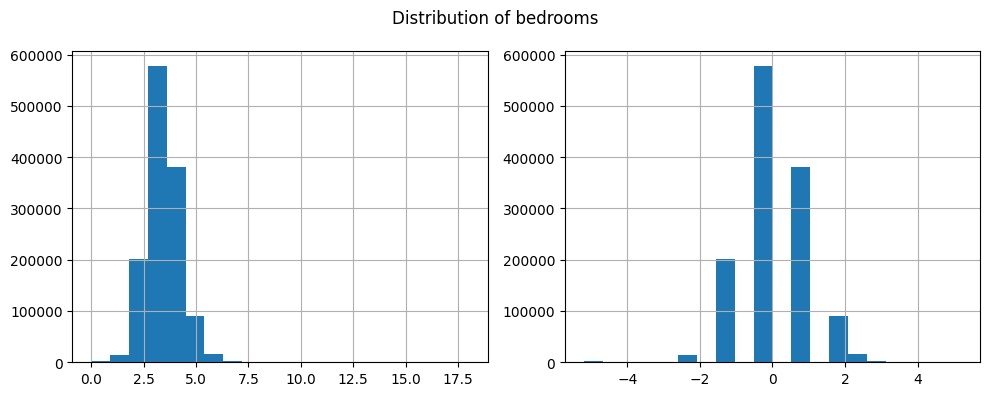

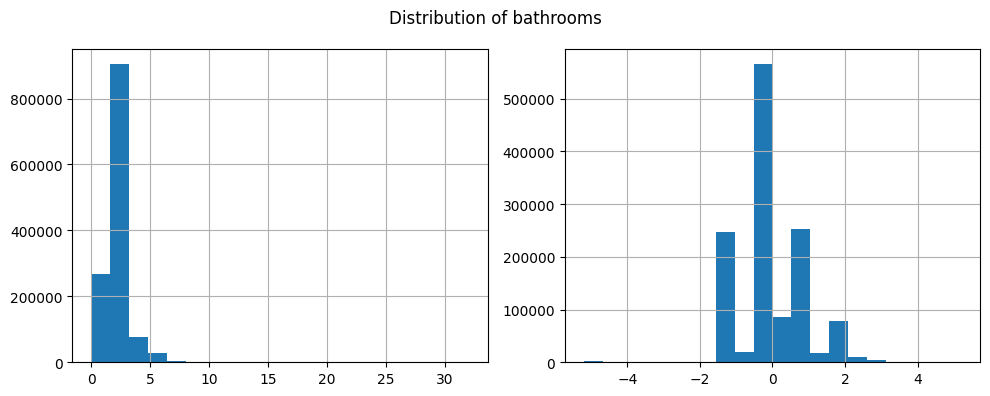

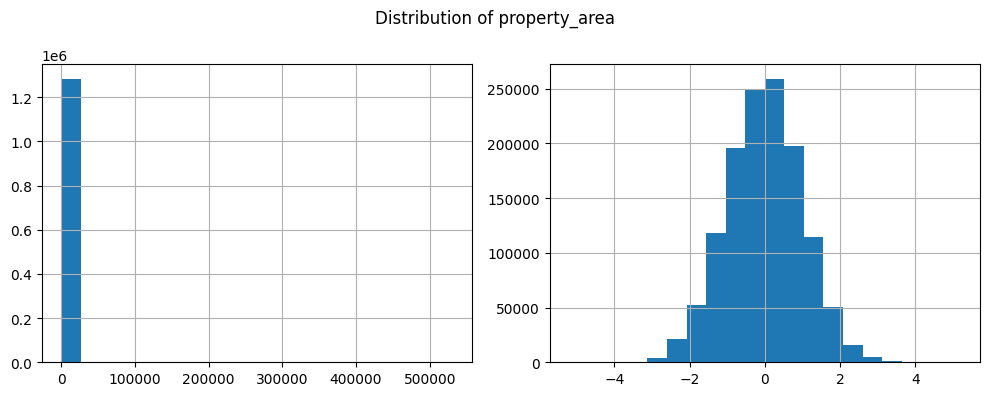

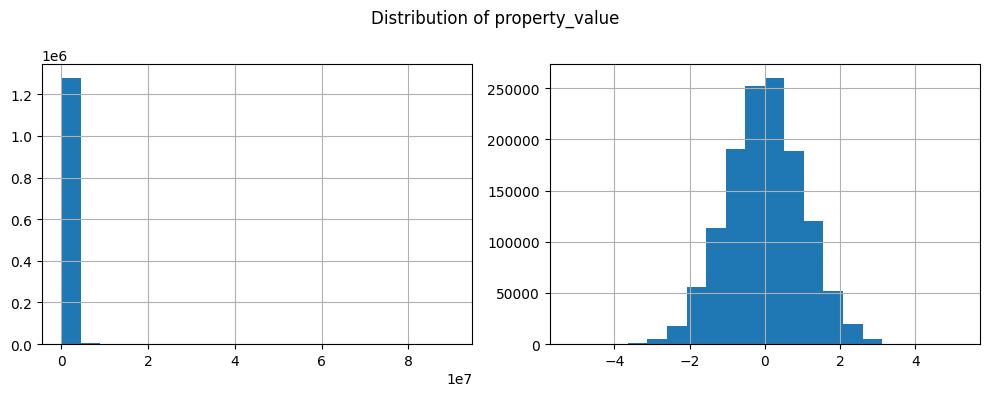

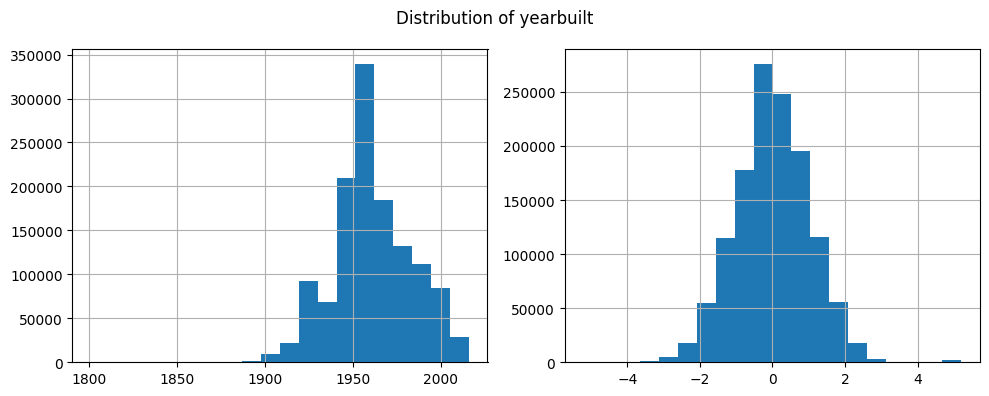

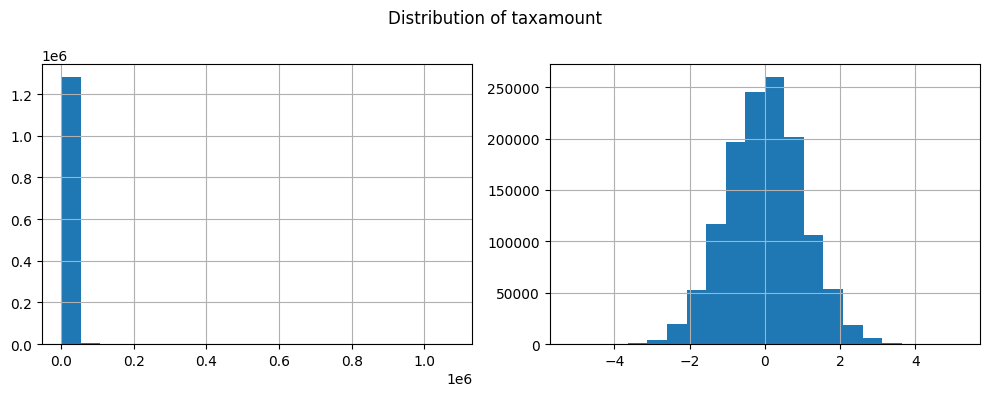

In [312]:
for col in df.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=20)
    
    plt.subplot(1,2,2)
    train_qtransform[col].hist(bins=20)
    
    plt.suptitle(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

4. [ ] Use the `QuantileTransformer`, but omit the `output_distribution` argument. Visualize your results. What do you notice?

In [296]:
std_q_transform = QuantileTransformer()

In [298]:
train_qtransform2 = pd.DataFrame(std_q_transform.fit_transform(df),columns=df.columns)

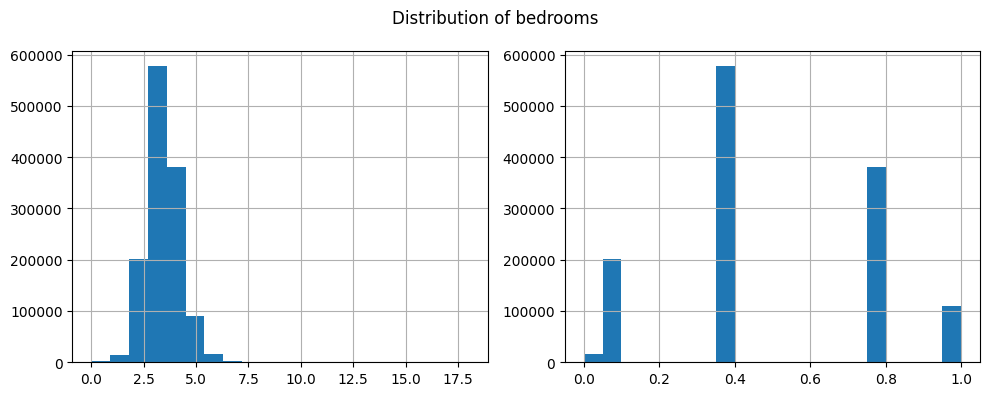

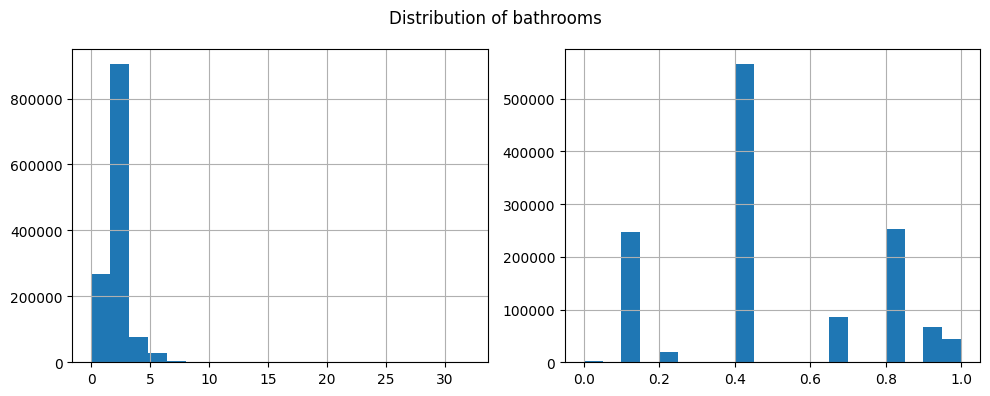

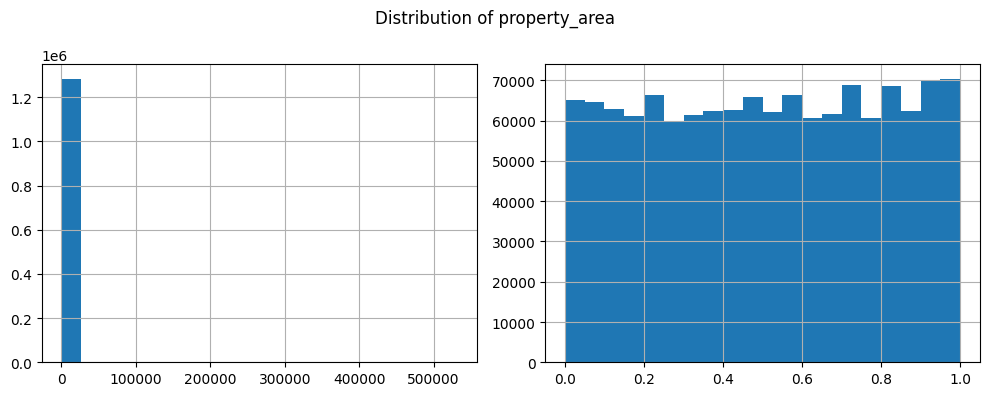

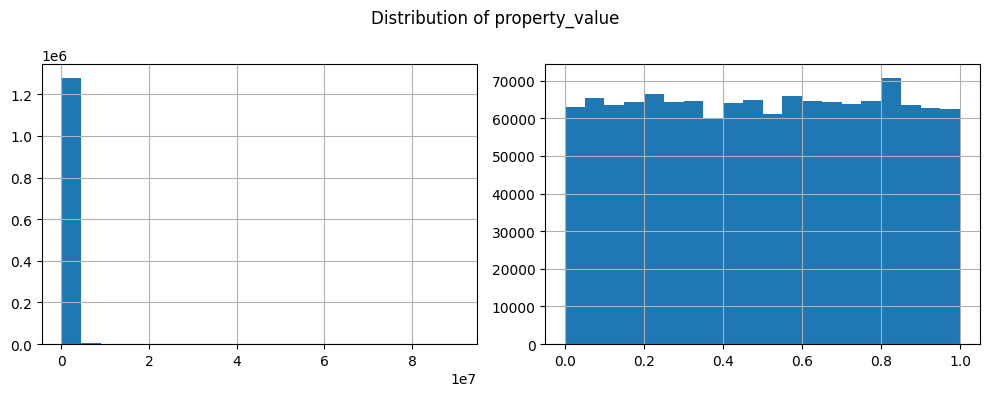

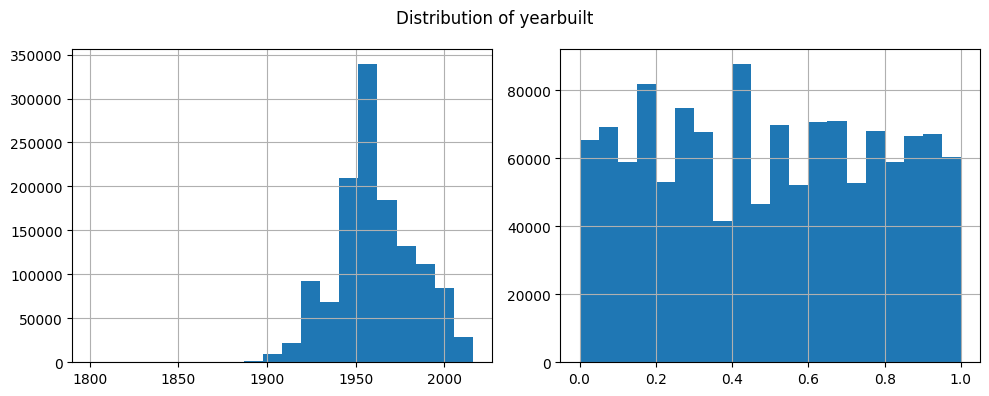

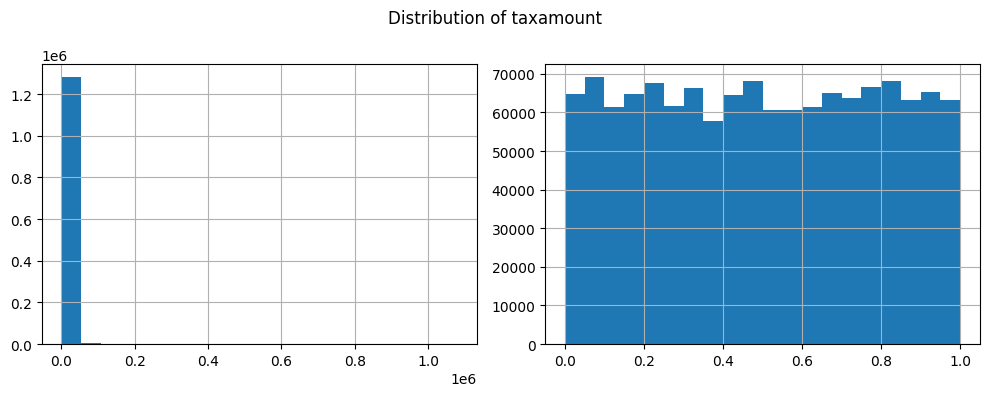

In [314]:
# visualize the distributions
for col in df.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=20)
    
    plt.subplot(1,2,2)
    train_qtransform2[col].hist(bins=20)
    
    plt.suptitle(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

I immediately do not like this version as much. It doesn't show much except for maybe the distribution of the bedrooms and bathrooms. Everything that is far more continuous is difficult to read and understand.

5. [ ] Based on the work you've done, choose a scaling method for your dataset. Write a function within your `prepare.py` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

From what I see, the min-max, standard, and robust all seem very similar. Based on the dataset and the number of outliers there seem to be, however, I think the robust scaler may be optimal for this work. It also has the highest accuracy when reverting to the original dataset.

In [376]:
def scale_Xy_split(train,validate,test):
    '''
    Takes train, validate, and test sets and scales them using the robust scaler. Splits them into X_set and y_set and then scales the data.
    
    Returns scaled X_set with y_set (unaffected)
    
    Parameters:
    -----------
    train: DataFrame
        - the train dataset to be transformed 
    validate: DataFrame
        - the validate dataset to be transformed
    test: DataFrame
        - the test dataset to be transformed
    
    
    '''
    # combine into single set for easy iteration (tvt_set)
    tvt_set = train,validate,test

    # split into X_set and y_sets
    # use list comprehension
    X_set = [df.drop(columns=['property_value']) for df in tvt_set]
    y_set = [df.property_value for df in tvt_set]

    # make the model
    scaler = RobustScaler()

    # define the columns to transform
    cols = ['bedrooms','bathrooms','property_area','taxamount']

    # fit_transform X_train
    X_set[0][cols] = scaler.fit_transform(X_set[0][cols])

    # transform X_validate, X_test
    X_set[1][cols] = scaler.transform(X_set[1][cols])
    X_set[2][cols] = scaler.transform(X_set[2][cols])

    return X_set, y_set


In [378]:
X_set,y_set = scale_Xy_split(train,validate,test)

In [379]:
X_set[0]

,bedrooms,bathrooms,property_area,yearbuilt,taxamount,fips,county
462820,2.0,2.0,1.461053,2005,0.890971,6111,Ventura
3880,0.0,0.0,0.062105,1961,0.768237,6037,Los Angeles
992263,1.0,0.0,-0.200000,1954,-0.769669,6037,Los Angeles
311722,0.0,0.5,0.397895,1999,0.015929,6111,Ventura
787985,1.0,0.0,0.688421,1962,0.775171,6037,Los Angeles
...,...,...,...,...,...,...,...
1966409,0.0,0.0,-0.180000,1963,-0.026945,6037,Los Angeles
1248263,1.0,1.0,1.106316,1979,0.035041,6059,Orange
28211,2.0,1.0,0.294737,1965,-0.048827,6037,Los Angeles
279547,1.0,2.5,2.156842,2001,2.304157,6059,Orange


<Axes: >

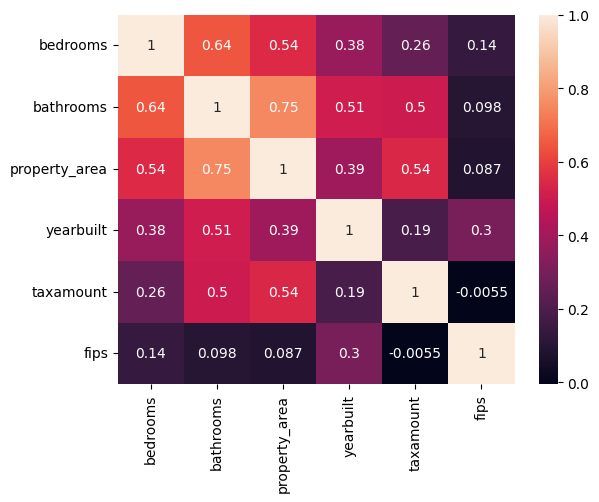

In [390]:
sns.heatmap(X_set[0].drop(columns='county').corr(),annot=True)